## Day 08
- 14/dec/2021

In [40]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits import mplot3d

In [2]:
make_regression?

In [7]:
X , y , coef = make_regression(
    n_samples=200,
    n_features=2,
    bias=3,
    noise=10,
    coef=True,
)
print(X.shape , y.shape , coef)

(200, 2) (200,) [96.11134576 16.58295188]


In [17]:
X[:5,:]

array([[-0.09002235, -0.39282276],
       [-0.16802772, -1.33044127],
       [-0.09880147,  1.44455091],
       [ 0.67110884,  2.26270304],
       [-0.13500378,  0.76125155]])

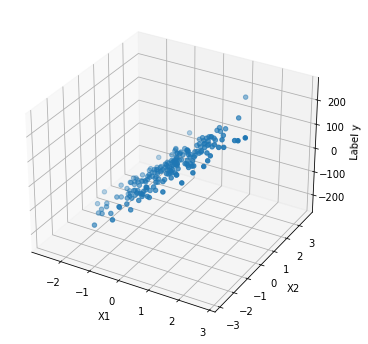

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")
plt.show()

In [11]:
class LinearRegressor:
    
    def fit(self , X , y ,epochs=1000 , learning_rate=0.01 , method = 'batch' , **kwargs):
        X = X.copy()
        ones_column = np.ones((len(X) , 1))
        X = np.concatenate([ones_column , X] , axis = 1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
        elif method == 'mini-batch':
             if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
             else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
            
        
        

In [ ]:
Acuuracy = total no. of correct prediction / total no. of prediction

In [2]:
## positional arguments
def func(a , b):
    print(a)
    print(b)
    
func(10 ,20)

10
20


In [3]:
## keyword arguments
def func(a , b):
    print(a)
    print(b)
    
func(b = 20 , a = 10)

10
20


In [5]:
## kwargs - kw means keyword arguments and args mean argument
def func(a , b , **kwargs): #3 ------------------ we **kwargs we can give n no. of keyword arguments
    print(a)
    print(b)
    print(kwargs)
    
func(10 , 20 , i = 30 , j = 40 , k = 90) #--------------------------- i ,j,k keyword arguments

10
20
{'i': 30, 'j': 40, 'k': 90}
